# Name: Saurabh Mittal
# Task2 : #2 Prediction Using Unsupervised ML

# Step1: Importing Libraries

In [31]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

# Step2: Reading Dataset

In [4]:
df=pd.read_csv("iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Step3: Preparing the data for the model

In [15]:
df1=df.copy()
df2=df.copy()

In [16]:
df1=df1.drop(columns=['Species','Id'])
df2=df2.drop(columns='Id')
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
df2.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Step4: Data Visualization

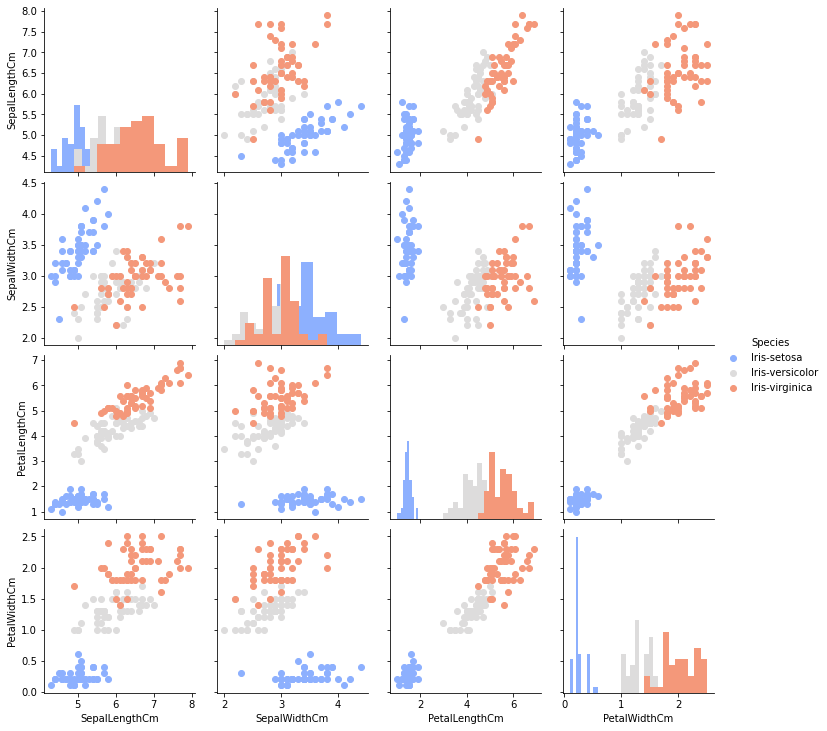

In [19]:
f=sns.PairGrid(df2,hue="Species",palette="coolwarm")
f=f.map_diag(plt.hist)
f=f.map_offdiag(plt.scatter)
f=f.add_legend()

# Step5: Using the elbow method to find the optimal number of clusters 

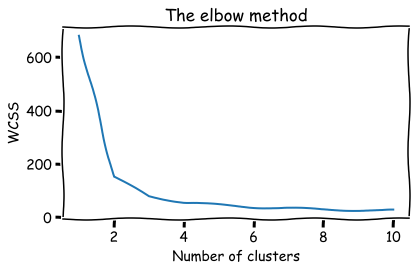

In [26]:
x=df1.values
z = []

for i in range(1, 11):
    kMeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 200, n_init = 15, random_state = 0)
    kMeans.fit(x)
    z.append(kMeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), z)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')# Within cluster sum of squares
plt.tight_layout()
plt.xkcd()
plt.show()

The optimum cluster is where the elbow occurs. This is when cluster sum of squares(WCSS) doesn't decrease significantly with every iteration. In Graph, we've seen that curve rapidly down and almost becomes flattened from the cluster 4. So, we choose the optimum number of cluster as 3

# Step6: Training the K-Means model on the dataset

In [27]:
kMeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 200, n_init = 15, random_state = 0)
prediction=kMeans.fit_predict(x)
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

# Step7: Visualizating the clusters

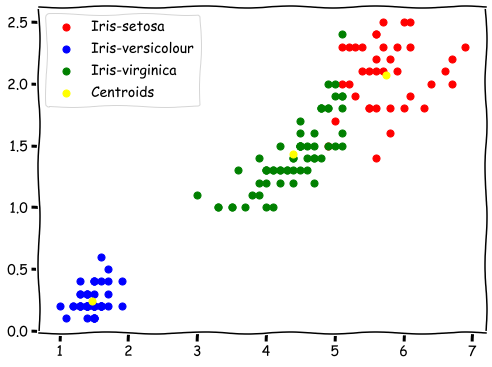

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(x[prediction == 0, 2], x[prediction == 0, 3], 
            s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(x[prediction == 1, 2], x[prediction == 1, 3], 
            s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[prediction == 2, 2], x[prediction == 2, 3],
            s = 50, c = 'green', label = 'Iris-virginica')

plt.scatter(kMeans.cluster_centers_[:, 2], kMeans.cluster_centers_[:,3], 
            s = 50, c = 'yellow', label = 'Centroids')

plt.legend()